<a href="https://colab.research.google.com/github/AngelJmzIsd/Iris/blob/main/PrediccionDiabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTAR LIBRERIAS
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')

#IMPORTAR EL MODULO VERSICOLOR
from google.colab import files
!cp /content/gdrive/MyDrive/ProyectoLibreria/iris.py /content
from iris import Setosa
from iris import Versicolor

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#IMPORTAR DATOS
diabetes = pd.read_csv('/content/gdrive/MyDrive/DATASETS/diabetes.csv')

Diabetes = Versicolor(diabetes,"conjunto de observaciones")

In [ ]:
Diabetes.dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#ANALISIS Y LIMPIEZA
print("Cantidad de columnas vacias Diabetes: ",len(Diabetes.getColumnasVacias()))
print("Cantidad de columnas NoNumericas Diabetes: ",len(Diabetes.getNombresNoNumericas()))
print("Cantidad de datos faltantes en Diabetes: ",sum(Diabetes.contarFaltantesColumnas(Diabetes.getNombresNumericas(),False)))

Cantidad de columnas vacias Diabetes:  0
Cantidad de columnas NoNumericas Diabetes:  0
Cantidad de datos faltantes en Diabetes:  0


In [ ]:
#Sustituir datos faltantes con la mediana
Diabetes.reemplazarFaltantesColumnas(Diabetes.getNombresNumericas(),"promedio")

0

In [ ]:
#ANALISIS Y LIMPIEZA
print("Cantidad de columnas vacias Diabetes: ",len(Diabetes.getColumnasVacias()))
print("Cantidad de columnas NoNumericas Diabetes: ",len(Diabetes.getNombresNoNumericas()))
print("Cantidad de datos faltantes en Diabetes: ",sum(Diabetes.contarFaltantesColumnas(Diabetes.getNombresNumericas(),False)))

Cantidad de columnas vacias Diabetes:  0
Cantidad de columnas NoNumericas Diabetes:  0
Cantidad de datos faltantes en Diabetes:  0


In [ ]:
Diabetes.dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
Diabetes.dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# **DIVIDIR EN CONJUNTO DE ENTRENAMIENTO Y DE PRUEBA**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
#FEATURE SELECTION

predictors=Diabetes.dataframe.drop(['Outcome'],axis=1).copy()

target=Diabetes.dataframe['Outcome'].copy()

predictors_new = SelectKBest(chi2, k=5).fit_transform(predictors, target)


In [ ]:
predictors_new

array([[  6. , 148. ,   0. ,  33.6,  50. ],
       [  1. ,  85. ,   0. ,  26.6,  31. ],
       [  8. , 183. ,   0. ,  23.3,  32. ],
       ...,
       [  5. , 121. , 112. ,  26.2,  30. ],
       [  1. , 126. ,   0. ,  30.1,  47. ],
       [  1. ,  93. ,   0. ,  30.4,  23. ]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(predictors_new, target, test_size = 0.2, random_state = 0)

# **ENTRENAR MODELO**

In [ ]:
from sklearn import tree
arbol = tree.DecisionTreeClassifier(random_state=0)
arbol = arbol.fit(x_train, y_train)

# **EVALUAR MODELO**

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report

In [ ]:
y_pred = arbol.predict(x_test)

In [ ]:
(classification_report(y_test, y_pred))

'              precision    recall  f1-score   support\n\n           0       0.83      0.84      0.83       107\n           1       0.62      0.60      0.61        47\n\n    accuracy                           0.77       154\n   macro avg       0.72      0.72      0.72       154\nweighted avg       0.76      0.77      0.76       154\n'

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       107
           1       0.62      0.60      0.61        47

    accuracy                           0.77       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.76      0.77      0.76       154



# **PROBAR EL OBJETO SETOSA DEL MODULO IRIS**

In [ ]:
predictors=Diabetes.dataframe.drop(['Outcome'],axis=1).copy()

target=Diabetes.dataframe['Outcome'].copy()

predictors_new = SelectKBest(chi2, k=5).fit_transform(predictors, target)

In [ ]:
sklearn_evaluator_object_numpy_type = Setosa(predictors_new,target)

In [ ]:
sklearn_evaluator_object_numpy_type.generarSetsTrainTest(0.2,0)

In [ ]:
sklearn_evaluator_object_numpy_type.entrenarArbol(0,0)
sklearn_evaluator_object_numpy_type.entrenarRegresionLogistica()
sklearn_evaluator_object_numpy_type.entrenarSVM()

In [ ]:
sklearn_evaluator_object_numpy_type.printReporteInd("arbol")

<<<    REPORTE INDIVIDUAL DEL MODELO:  Arbol de decisiones  >>>> 

Accuracy:  0.7662337662337663
Precision:  0.6222222222222222
Recall (sensibilidad):  0.5957446808510638
Especificidad:  0.8411214953271028
F1:  0.608695652173913


In [ ]:
sklearn_evaluator_object_numpy_type.printReporteInd("logreg")

<<<    REPORTE INDIVIDUAL DEL MODELO:  Regresion Logistica  >>>> 

Accuracy:  0.7987012987012987
Precision:  0.7105263157894737
Recall (sensibilidad):  0.574468085106383
Especificidad:  0.897196261682243
F1:  0.6352941176470589


In [ ]:
sklearn_evaluator_object_numpy_type.printReporteInd("svm")

<<<    REPORTE INDIVIDUAL DEL MODELO:  Support Vector Machine  >>>> 

Accuracy:  0.7857142857142857
Precision:  0.7058823529411765
Recall (sensibilidad):  0.5106382978723404
Especificidad:  0.9065420560747663
F1:  0.5925925925925926


MATRICES DE CONFUSION

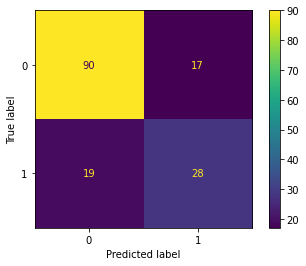

<Figure size 432x288 with 0 Axes>

In [ ]:
sklearn_evaluator_object_numpy_type.mostrarMatrizConfusion("arbol")

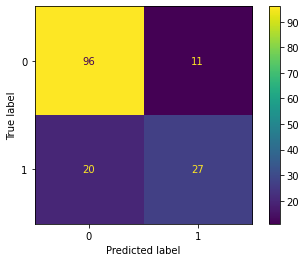

<Figure size 432x288 with 0 Axes>

In [ ]:
sklearn_evaluator_object_numpy_type.mostrarMatrizConfusion("logreg")

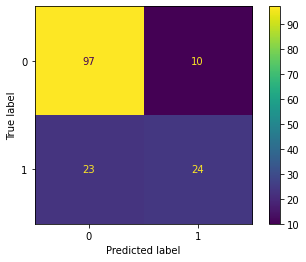

<Figure size 432x288 with 0 Axes>

In [ ]:
sklearn_evaluator_object_numpy_type.mostrarMatrizConfusion("svm")

CURVAS ROC

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


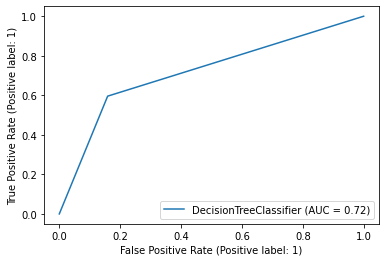

<Figure size 432x288 with 0 Axes>

In [ ]:
sklearn_evaluator_object_numpy_type.mostrarCurvaROC("arbol")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


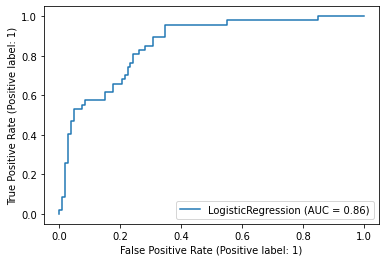

<Figure size 432x288 with 0 Axes>

In [ ]:
sklearn_evaluator_object_numpy_type.mostrarCurvaROC("logreg")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


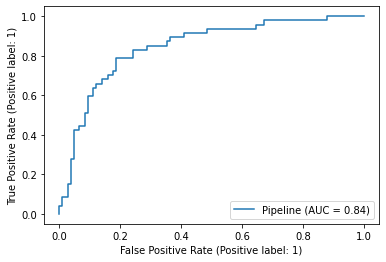

<Figure size 432x288 with 0 Axes>

In [ ]:
sklearn_evaluator_object_numpy_type.mostrarCurvaROC("svm")